In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.DataFrame({'Weight':[45,58,48,60,70,78,80,90,95,78,82,95,105,100,85,78,50,65,76,87,45,56,72],"Height":[120,135,123,145,160,162,163,175,182,170,176,182,175,183,170,177,140,159,150,167,129,140,160]})
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

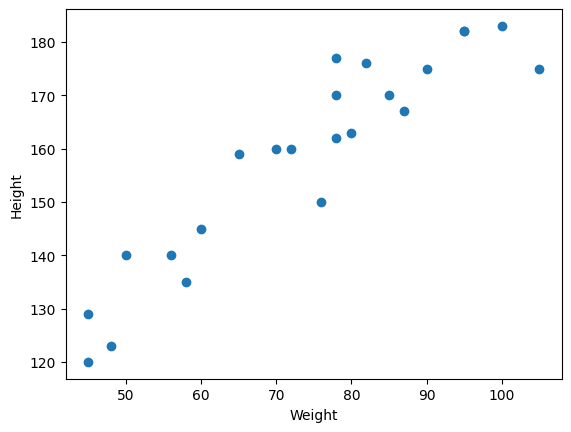

In [3]:
#scatter plot to understand the relationship between the dependent and independent variable 
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
## Corelation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


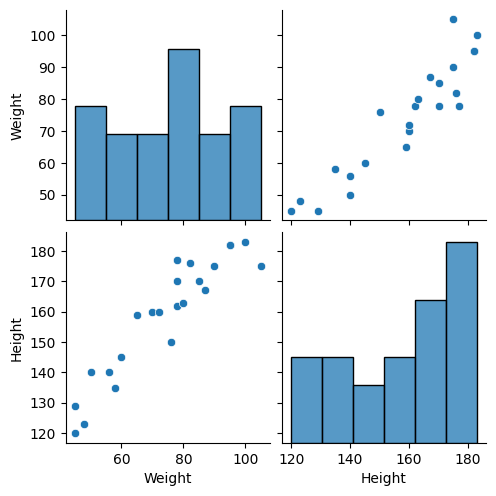

In [5]:
# seaborn for advanced visualization
import seaborn as sns
sns.pairplot(df)

In [6]:
# dependent and iindependent  features
X=df[['Weight']] ## independent features should be in dataframe or 2d array
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,Weight
0,45
1,58
2,48
3,60
4,70


In [7]:
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [8]:
y=df['Height'] # the dependent features can be Series
print(type(y))
print(y.shape)
y.head()

<class 'pandas.core.series.Series'>
(23,)


0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [9]:
# Train Test split
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print("Shape of X_train")
print(X_train.shape)
print("Shape of X_test")
print(X_test.shape)
print("Shape of y_train")
print(y_train.shape)
print("Shape of y_test")
print(y_test.shape)

Shape of X_train
(17, 1)
Shape of X_test
(6, 1)
Shape of y_train
(17,)
Shape of y_test
(6,)


In [11]:
## Standardization (Because the Weights are in kg and Heights are in cm)
from sklearn.preprocessing import StandardScaler

In [12]:

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [13]:
X_test = scaler.transform(X_test) # the transform uses the mean and standard_deviation of X_train to avoid the Data Leakage
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [14]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [15]:
regression=LinearRegression(n_jobs=-1)

In [16]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [17]:
print("Coefficient or slope is :", regression.coef_)
print("The intecept is",regression.intercept_)

Coefficient or slope is : [17.2982057]
The intecept is 156.47058823529412


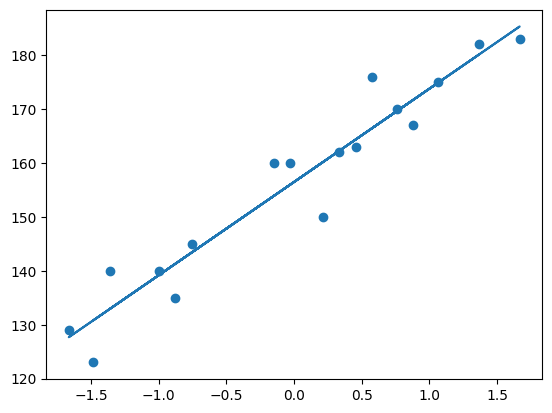

In [18]:
## plotting the trianing data with bestfit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### Prediction on test data
1. predicted height output = intercept + coef_ * Weights
2. y_pred = 156.470 + 17.29 * (X_test)

In [19]:
y_pred=regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [20]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
mse = mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)
print("MSE : ",mse)
print("MAE : ",mae)
print("RMSE : ",rmse)

MSE :  114.84069295228699
MAE :  9.66512588679501
RMSE :  10.716374991212605


## R square

**R^2 = 1 - (SSR/SST)**

R^2 = coefficient of determination

SSR = sum of squared residuals

SST = total sum of squares

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.7360826717981276

In [23]:
# Prediction for neaw data
regression.predict(scaler.transform([[72]]))

e:\Complete-Python-Bootcamp-main\mlvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

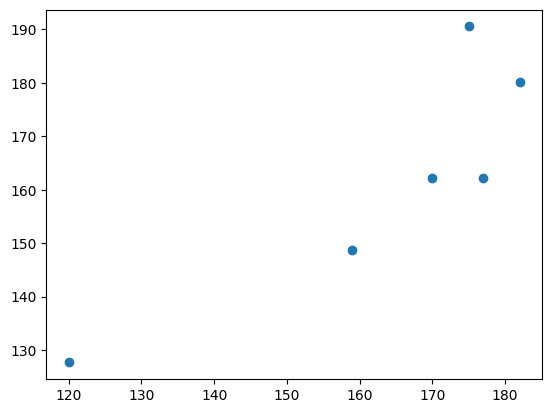

In [24]:
# Assumption 
# plot a scatter plot for the prediction

plt.scatter(y_test,y_pred)

In [ ]:
# residuals
residuals = y_test - y_pred
residuals


15    14.735003
9      7.735003
0     -7.683471
8      1.920277
17    10.358028
12   -15.558973
Name: Height, dtype: float64

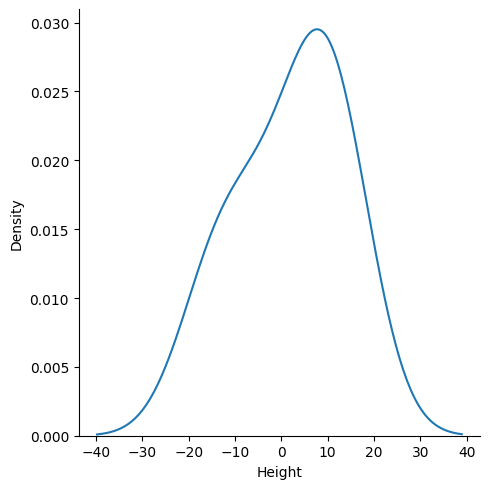

In [26]:
# plot the residuals
sns.displot(residuals,kind='kde')

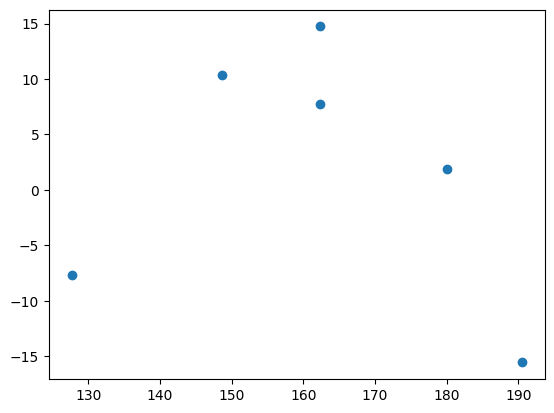

In [27]:
# Scatter plot with respect to predition and residuals
# uniform distribution
plt.scatter(y_pred,residuals)